# Analisando correlação entre votos obtidos pelos candidatos e a taxa de alfabetização em cada município

In [1]:
import pandas as pd
import numpy as np
import geopandas
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
db_path = 'eleicao.db'
conn = sqlite3.connect(db_path)

In [3]:
cur = conn.cursor()

## Entendendo como a taxa de alfabetização é distribuída pelos municípios do estado

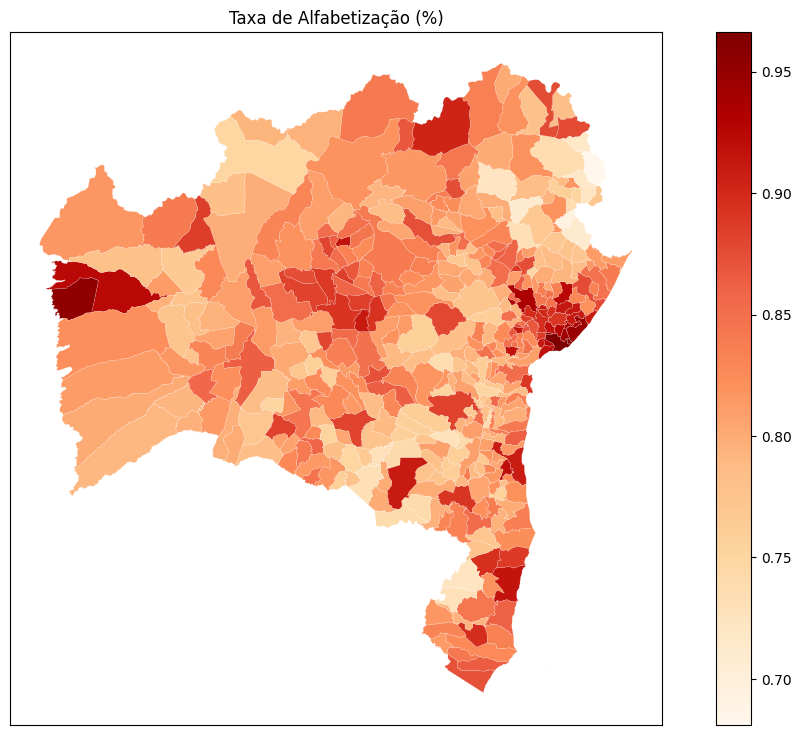

In [13]:
querry = """
SELECT m.GEOMETRY, a.V00900,a.V00901,  a.V00900 * 1.0 / (a.V00900 + a.V00901) as TAXA_ALFABETIZACAO
FROM municipio m,alfabetizacao a
WHERE m.CD_MUN = a.CD_MUN 
"""

r = geopandas.read_postgis(querry,conn,geom_col='GEOMETRY')
r.plot(column = 'TAXA_ALFABETIZACAO',legend=True,cmap='OrRd',edgecolor='white',linewidth = 0.1,figsize=(14,9))
plt.xticks([])
plt.yticks([])
plt.title('Taxa de Alfabetização (%)')
plt.show()

## Entendendo a distribuição dos votos dos candidatos selecionados

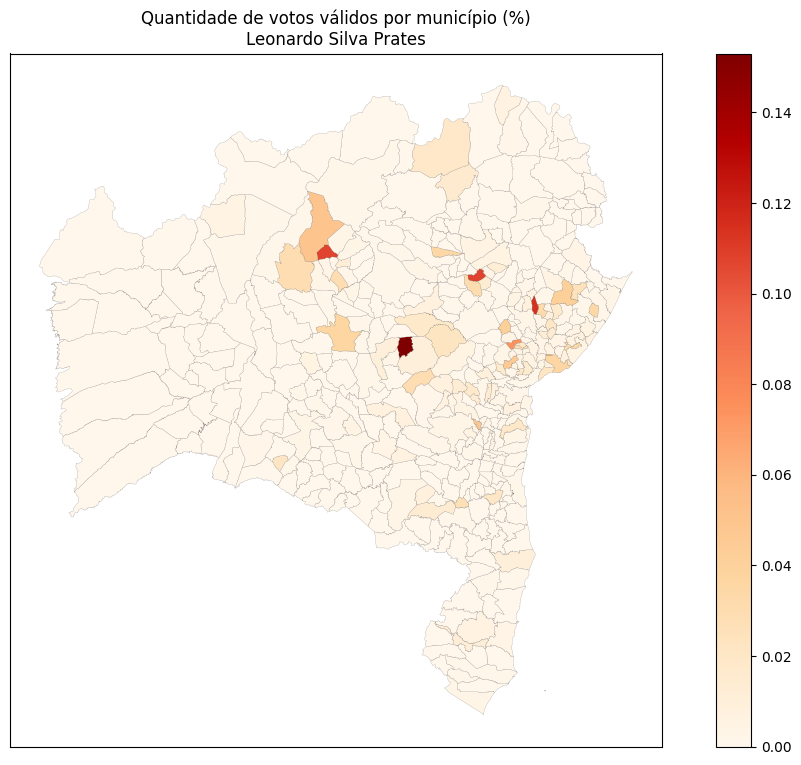

In [12]:
querry = """
select m.GEOMETRY, SUM(v.QT_VOTOS_NOMINAIS_VALIDOS ) * 1.0 / b.V0001 as TOTAL_VOTOS_VALIDOS
from votos_candidato v,municipio as m, basico as b
where v.NM_CANDIDATO = 'LEONARDO SILVA PRATES' and v.CD_MUN = m.CD_MUN and v.CD_MUN = b.CD_MUN  
group by v.CD_MUN 
"""

r = geopandas.read_postgis(querry,conn,geom_col='GEOMETRY')
r.plot(column = 'TOTAL_VOTOS_VALIDOS',legend=True,cmap='OrRd',edgecolor='#4B4B4B',linewidth = 0.1,figsize=(14,9))

plt.xticks([])
plt.yticks([])
plt.title('Quantidade de votos válidos por município (%)\nLeonardo Silva Prates')
plt.show()

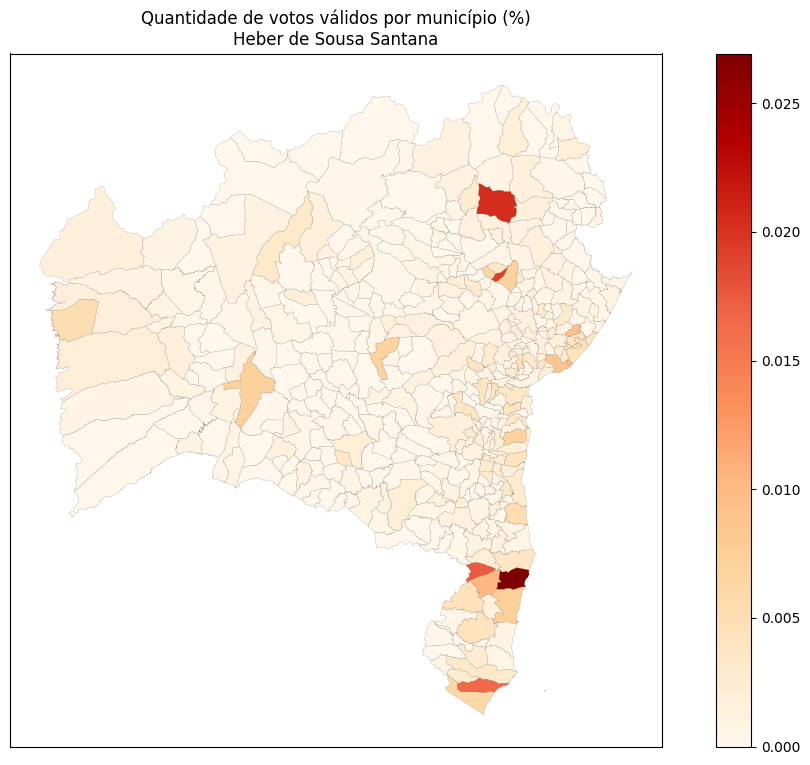

In [14]:
querry = """
select m.GEOMETRY, SUM(v.QT_VOTOS_NOMINAIS_VALIDOS ) * 1.0 / b.V0001 as TOTAL_VOTOS_VALIDOS
from votos_candidato v,municipio as m, basico as b
where v.NM_CANDIDATO = 'HEBER DE SOUSA SANTANA' and v.CD_MUN = m.CD_MUN and v.CD_MUN = b.CD_MUN  
group by v.CD_MUN 
"""

r = geopandas.read_postgis(querry,conn,geom_col='GEOMETRY')
r.plot(column = 'TOTAL_VOTOS_VALIDOS',legend=True,cmap='OrRd',edgecolor='#4B4B4B',linewidth = 0.1,figsize=(14,9))

plt.xticks([])
plt.yticks([])
plt.title('Quantidade de votos válidos por município (%)\nHeber de Sousa Santana')
plt.show()

## Calculando coeficiente de correlação entre os votos e a taxa de alfabetização em cada cidade para cada candidato

In [26]:
querry = """
select v.*, SUM(v.QT_VOTOS_NOMINAIS_VALIDOS ) * 1.0 / b.V0001 as TOTAL_VOTOS_VALIDOS, a.V00900,a.V00901,  a.V00900 * 1.0 / (a.V00900 + a.V00901) as TAXA_ALFABETIZACAO
from votos_candidato v, basico as b,alfabetizacao as a
where v.NM_CANDIDATO = 'HEBER DE SOUSA SANTANA' and v.CD_MUN = b.CD_MUN  and v.CD_MUN = a.CD_MUN 
group by v.CD_MUN 
"""

df = pd.read_sql_query(querry,conn)
print('Coeficiente de correlaçao para o candidato Heber de Sousa Santana',df['TOTAL_VOTOS_VALIDOS'].corr(df['TAXA_ALFABETIZACAO']))

Coeficiente de correlaçao para o candidato Heber de Sousa Santana 0.22905078316318137


In [27]:
querry = """
select v.*, SUM(v.QT_VOTOS_NOMINAIS_VALIDOS ) * 1.0 / b.V0001 as TOTAL_VOTOS_VALIDOS, a.V00900,a.V00901,  a.V00900 * 1.0 / (a.V00900 + a.V00901) as TAXA_ALFABETIZACAO
from votos_candidato v, basico as b,alfabetizacao as a
where v.NM_CANDIDATO = 'LEONARDO SILVA PRATES' and v.CD_MUN = b.CD_MUN  and v.CD_MUN = a.CD_MUN 
group by v.CD_MUN 
"""

df = pd.read_sql_query(querry,conn)
print('Coeficiente de correlaçao para o candidato Leonardo Silva Prates',df['TOTAL_VOTOS_VALIDOS'].corr(df['TAXA_ALFABETIZACAO']))

Coeficiente de correlaçao para o candidato Leonardo Silva Prates 0.10228954469145687


## Conclusão

Para o caso dos dois candidatos analisados acima não é possível perceber uma correlação significativa entre a taxa de alfabetização dos eleitores e a quantidade de votos recebidos por cada um deles nos municípios, mesmo que para o candidato Heber de Sousa Santana o coeficiente de correlação seja duas vezes maior que o candidato Leonardo Silva Prates. Sendo assim, este indicador não se mostrou impactante na análise dos fatores que levam àquela distribuição dos votos dos candidatos analisados.

Um fator importante a ser mencionado é que a análise embasada nos gráficos mostra de forma mais clara a pouca correlação entre os fatores apresentados se comparado com os coeficientes numéricos comumente utilizados neste tipo de tarefa.

# Analisando a correlação entre os votos dos candidatos e o rendimento do cultivo de soja nos municípios

Para o nosso dado extra, o censo-agro, utilizaremos o rendimento dos cultivos de soja como um inidicador agropecuário impactante para análise, dado que o cultivo de soja é a atividade econômica predominante deste setor e pode, portanto, impactar de maneira significativa nos votos dos eleitores. 

## Entendendo como o rendimento das culturas de soja estão distribuídas pelos municípios do estado

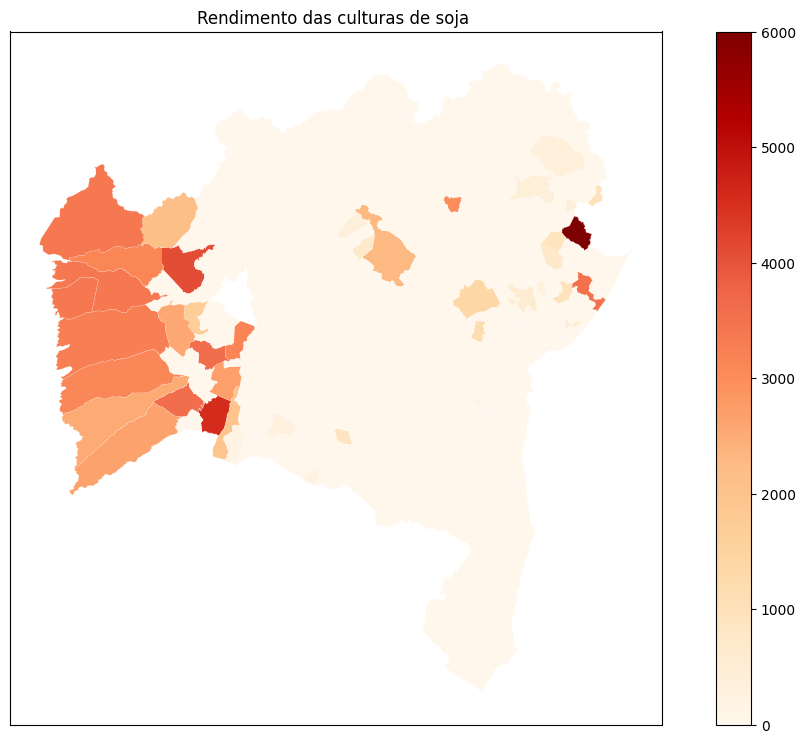

In [30]:
querry="""
select m.GEOMETRY ,ca.rendimento_soja as RENDIMENTO_SOJA
from censo_agro ca, municipio m 
WHERE ca.CD_MUN = m.CD_MUN
"""

r = geopandas.read_postgis(querry,conn,geom_col='GEOMETRY')
r.plot(column = 'RENDIMENTO_SOJA',legend=True,cmap='OrRd',edgecolor='white',linewidth = 0.1,figsize=(14,9))

plt.xticks([])
plt.yticks([])
plt.title('Rendimento das culturas de soja ')
plt.show()

## Calculando coeficiente de correlação entre os dados em questão para ambos os candidatos avaliados

In [33]:
querry = """
select v.*, SUM(v.QT_VOTOS_NOMINAIS_VALIDOS ) * 1.0 / b.V0001 as TOTAL_VOTOS_VALIDOS, ca.rendimento_soja as RENDIMENTO_SOJA
from votos_candidato v, basico as b, censo_agro as ca
where v.NM_CANDIDATO = 'HEBER DE SOUSA SANTANA' and v.CD_MUN = b.CD_MUN  and v.CD_MUN = ca.CD_MUN 
group by v.CD_MUN 
"""

df = pd.read_sql_query(querry,conn)
print('Coeficiente de correlaçao para o candidato Heber de Sousa Santana',df['TOTAL_VOTOS_VALIDOS'].corr(df['RENDIMENTO_SOJA']))

Coeficiente de correlaçao para o candidato Heber de Sousa Santana -0.0346751582107667


In [34]:
querry = """
select v.*, SUM(v.QT_VOTOS_NOMINAIS_VALIDOS ) * 1.0 / b.V0001 as TOTAL_VOTOS_VALIDOS, ca.rendimento_soja as RENDIMENTO_SOJA
from votos_candidato v, basico as b, censo_agro as ca
where v.NM_CANDIDATO = 'LEONARDO SILVA PRATES' and v.CD_MUN = b.CD_MUN  and v.CD_MUN = ca.CD_MUN 
group by v.CD_MUN 
"""

df = pd.read_sql_query(querry,conn)
print('Coeficiente de correlaçao para o candidato Leonardo Silva Prates',df['TOTAL_VOTOS_VALIDOS'].corr(df['RENDIMENTO_SOJA']))

Coeficiente de correlaçao para o candidato Leonardo Silva Prates -0.07507291798986386


## Conclusão

Ao comparar as imagens que mostram a distribuição dos votos dos dois candidatos e a imagem que mostra o rendimento das culturas de soja pelos municípios é possível notar que não há nenhuma correlação que seja possível identificar visualmente, dado que nenhuma região de concentração de votos coincide com alto ou baixo rendimento das cukturas de soja, o que pode ser confirmado pelos valores de coeficientes de correlação calculados para ambos os candidatos que se aporesentam bem próximos de 0, demonstrando que os dados não apresentam, a princípio, nenhuma correlação entre si, seja ela positiva ou negativa.